In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
#importing the data
data_daily = pd.read_csv("/worldometer_coronavirus_daily_data.csv")
data_daily

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
117059,2021-7-26,Zimbabwe,99944.0,2050.0,28944.0,3173.0,79.0
117060,2021-7-27,Zimbabwe,101711.0,1767.0,27935.0,3280.0,107.0
117061,2021-7-28,Zimbabwe,103567.0,1856.0,28844.0,3340.0,60.0
117062,2021-7-29,Zimbabwe,105656.0,2089.0,28841.0,3421.0,81.0


In [3]:
#checking for missing values
data_daily.isnull().sum()

date                           0
country                        0
cumulative_total_cases         0
daily_new_cases             6873
active_cases                 532
cumulative_total_deaths     6916
daily_new_deaths           20843
dtype: int64

In [4]:
#checking for datatype of each column
data_daily.dtypes

date                        object
country                     object
cumulative_total_cases     float64
daily_new_cases            float64
active_cases               float64
cumulative_total_deaths    float64
daily_new_deaths           float64
dtype: object

In [5]:
data_daily.dropna().describe()

,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
count,9.571000e+04,95710.000000,9.571000e+04,95710.000000,95710.000000
mean,3.901953e+05,2046.112204,5.217205e+04,8986.507481,42.075374
std,2.044448e+06,11296.908038,3.740737e+05,40362.503163,199.717853
min,0.000000e+00,-322.000000,-1.432100e+04,0.000000,-31.000000
25%,2.098000e+03,4.000000,2.210000e+02,33.000000,0.000000
50%,1.426400e+04,77.000000,1.948000e+03,232.000000,1.000000
75%,1.325718e+05,699.000000,1.420975e+04,2482.000000,11.000000
max,3.568851e+07,414433.000000,9.041162e+06,629064.000000,5015.000000


In [6]:
#checking for missing values
data_daily.isnull().sum()

date                           0
country                        0
cumulative_total_cases         0
daily_new_cases             6873
active_cases                 532
cumulative_total_deaths     6916
daily_new_deaths           20843
dtype: int64

In [7]:
# group by country
data_daily.groupby("country")["daily_new_deaths"].sum()

country
Afghanistan                  6708.0
Albania                      2456.0
Algeria                      4219.0
Andorra                       128.0
Angola                       1006.0
                              ...  
Wallis And Futuna Islands       6.0
Western Sahara                  0.0
Yemen                        1373.0
Zambia                       3375.0
Zimbabwe                     3489.0
Name: daily_new_deaths, Length: 220, dtype: float64

In [8]:
data_daily.groupby("country").sum()

,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
country,,,,,
Afghanistan,24235767.0,147153.0,5233695.0,971144.0,6708.0
Albania,27988337.0,133034.0,5457903.0,528149.0,2456.0
Algeria,36536133.0,170188.0,10382933.0,1066959.0,4219.0
Andorra,3249618.0,14677.0,195443.0,39975.0,128.0
Angola,7161824.0,42645.0,1286168.0,171801.0,1006.0
...,...,...,...,...,...
Wallis And Futuna Islands,60285.0,444.0,8038.0,819.0,6.0
Western Sahara,4587.0,6.0,566.0,431.0,0.0
Yemen,1390433.0,7057.0,317332.0,321671.0,1373.0


In [9]:
# ==> describe each group
data_daily.groupby("country")["daily_new_deaths"].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Afghanistan,522.0,12.850575,20.387152,0.0,1.0,5.0,12.75,101.0
Albania,506.0,4.853755,5.364935,0.0,0.0,3.0,7.00,21.0
Algeria,521.0,8.097889,5.351493,0.0,4.0,8.0,10.00,49.0
Andorra,515.0,0.248544,0.654506,0.0,0.0,0.0,0.00,6.0
Angola,488.0,2.061475,2.216309,0.0,0.0,2.0,3.00,18.0
...,...,...,...,...,...,...,...,...
Wallis And Futuna Islands,132.0,0.045455,0.242872,0.0,0.0,0.0,0.00,2.0
Western Sahara,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,456.0,3.010965,5.346241,0.0,0.0,1.0,4.00,52.0


In [10]:
data_daily.groupby("date").sum()

,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
date,,,,,
2020-1-22,571.0,0.0,554.0,17.0,0.0
2020-1-23,830.0,259.0,771.0,25.0,8.0
2020-1-24,1287.0,457.0,1208.0,41.0,16.0
2020-1-25,1975.0,688.0,1870.0,56.0,15.0
2020-1-26,2744.0,769.0,2613.0,80.0,24.0
...,...,...,...,...,...
2021-7-26,195395038.0,466727.0,13830379.0,4183960.0,7506.0
2021-7-27,195995933.0,600895.0,13969664.0,4193458.0,9498.0
2021-7-28,196657847.0,661914.0,14183427.0,4203654.0,10196.0


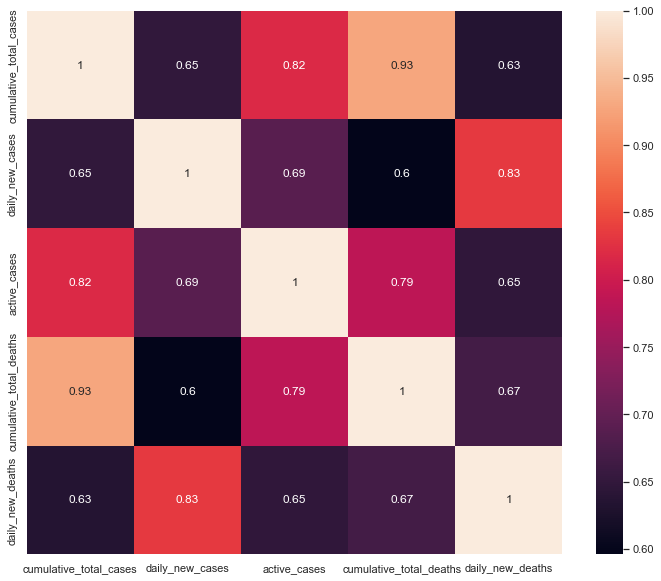

In [11]:
#using heatmap see the correlation between features
plt.figure(figsize=(12,10))
cor = data_daily.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [12]:
#importing the data
data_sum = pd.read_csv("/worldometer_coronavirus_summary_data.csv")
data_sum

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,147473,6736.0,98073.0,42664.0,1124.0,3699,169.0,707244.0,17739.0,39869084
1,Albania,Europe,133081,2457.0,130222.0,402.0,3.0,46299,855.0,916777.0,318945.0,2874408
2,Algeria,Africa,171392,4254.0,115276.0,51862.0,47.0,3834,95.0,230861.0,5164.0,44701619
3,Andorra,Europe,14678,128.0,14210.0,340.0,NaN,189643,1654.0,193595.0,2501292.0,77398
4,Angola,Africa,42646,1008.0,36708.0,4930.0,8.0,1256,30.0,681443.0,20065.0,33961015
...,...,...,...,...,...,...,...,...,...,...,...,...
215,Wallis And Futuna Islands,Australia/Oceania,445,7.0,438.0,0.0,NaN,40359,635.0,20508.0,1859967.0,11026
216,Western Sahara,Africa,10,1.0,8.0,1.0,NaN,16,2.0,NaN,NaN,613090
217,Yemen,Asia,7061,1375.0,4185.0,1501.0,23.0,231,45.0,152937.0,5009.0,30530919
218,Zambia,Africa,195816,3389.0,187236.0,5191.0,422.0,10341,179.0,2089592.0,110352.0,18935680


In [13]:
#checking for missing values
data_sum.isnull().sum()

country                            0
continent                          0
total_confirmed                    0
total_deaths                      13
total_recovered                    1
active_cases                       1
serious_or_critical               74
total_cases_per_1m_population      0
total_deaths_per_1m_population    16
total_tests                       10
total_tests_per_1m_population     10
population                         0
dtype: int64

In [14]:
#checking for datatype of each column
data_sum.dtypes

country                            object
continent                          object
total_confirmed                     int64
total_deaths                      float64
total_recovered                   float64
active_cases                      float64
serious_or_critical               float64
total_cases_per_1m_population       int64
total_deaths_per_1m_population    float64
total_tests                       float64
total_tests_per_1m_population     float64
population                          int64
dtype: object

In [15]:
data_sum.dropna().describe()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
count,1.440000e+02,144.000000,1.440000e+02,1.440000e+02,144.000000,144.000000,144.000000,1.440000e+02,1.440000e+02,1.440000e+02
mean,1.307081e+06,26832.638889,1.184411e+06,9.583686e+04,597.895833,48260.590278,806.881944,1.955644e+07,9.031496e+05,4.726722e+07
std,4.386056e+06,83171.849105,3.955494e+06,4.729728e+05,1632.836961,40317.198544,772.783946,6.523976e+07,1.677604e+06,1.704177e+08
min,5.890000e+02,3.000000,1.040000e+02,-1.489000e+03,1.000000,65.000000,3.000000,1.714700e+04,5.009000e+03,3.044800e+04
25%,3.404525e+04,507.000000,3.120325e+04,1.206000e+03,9.000000,10647.000000,123.000000,3.612762e+05,1.159155e+05,2.063909e+06
50%,1.970805e+05,2901.000000,1.695775e+05,9.814500e+03,36.500000,42805.000000,607.000000,2.082408e+06,4.277675e+05,9.227520e+06
75%,6.737082e+05,14695.000000,6.552955e+05,3.883925e+04,307.000000,80596.750000,1226.250000,1.142994e+07,1.015640e+06,3.396843e+07
max,3.573397e+07,629290.000000,3.081287e+07,5.438593e+06,9375.000000,162265.000000,3117.000000,5.295773e+08,1.311142e+07,1.439324e+09


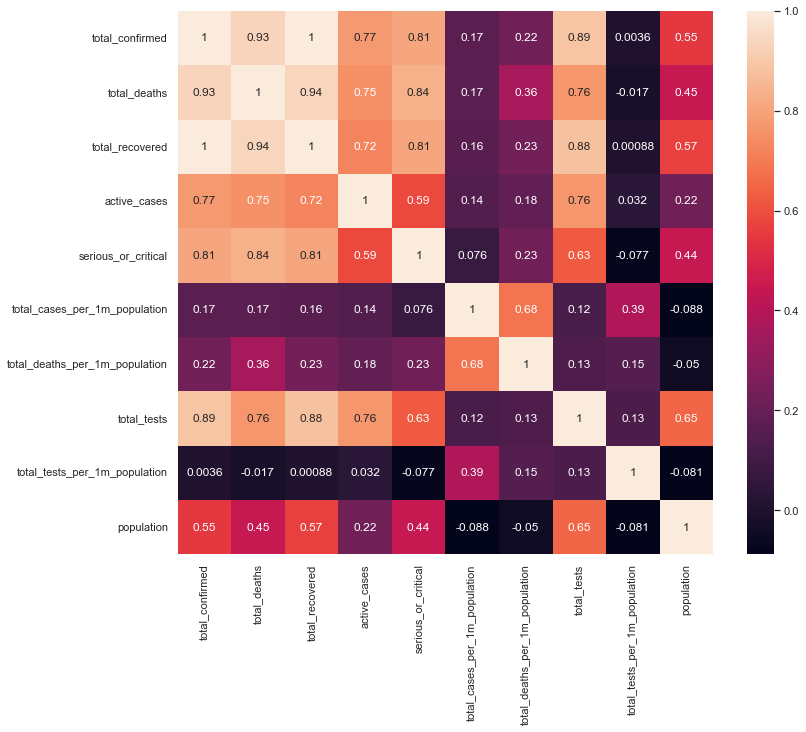

In [16]:
#using heatmap see the correlation between features
plt.figure(figsize=(12,10))
cor = data_sum.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [17]:
data_sum.groupby("continent").sum()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
continent,,,,,,,,,,
Africa,6762955,170457.0,5904417.0,688081.0,4257.0,750698,11174.0,5.949918e+07,5559767.0,1375019674
Asia,62022664,896553.0,58041110.0,3085001.0,33813.0,1673292,16369.0,1.100267e+09,41285475.0,4645997703
Australia/Oceania,105157,1537.0,77487.0,26133.0,111.0,148684,1490.0,2.805867e+07,3992923.0,42830447
Europe,51498242,1133252.0,46828215.0,3536775.0,7856.0,3819005,69950.0,1.078771e+09,95020033.0,748117090
North America,42559808,940299.0,35351307.0,6268202.0,16400.0,1509203,20782.0,5.971324e+08,36115379.0,594077076
South America,35533508,1089781.0,31323073.0,1207651.0,25481.0,877409,24503.0,1.436160e+08,7569876.0,434584768
